In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/7/data

/content/drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/7/data


In [0]:
# https://www.dropbox.com/s/0pigmmmynbf9xwq/dataset1.zip

# annotation_preped_train & test 데이터 2개가 있다.

dir_data = "segmentation"
dir_seg = dir_data + "/annotations_prepped_train/" # segmentation
dir_img = dir_data + "/images_prepped_train/" # image data

In [0]:
import glob, os 
all_img_paths = glob.glob(os.path.join(dir_img, '*.png')) 
all_img_paths[:5]

['segmentation/images_prepped_train/0016E5_06900.png',
 'segmentation/images_prepped_train/0001TP_007260.png',
 'segmentation/images_prepped_train/0001TP_007500.png',
 'segmentation/images_prepped_train/0006R0_f01410.png',
 'segmentation/images_prepped_train/0016E5_01200.png']

In [0]:
import glob, os
all_mask_paths = glob.glob(os.path.join(dir_seg, '*.png'))
all_mask_paths[:5]

['segmentation/annotations_prepped_train/0016E5_02340.png',
 'segmentation/annotations_prepped_train/0016E5_01980.png',
 'segmentation/annotations_prepped_train/0016E5_05580.png',
 'segmentation/annotations_prepped_train/0006R0_f03660.png',
 'segmentation/annotations_prepped_train/0006R0_f01740.png']

In [0]:
x = []
y = []
count = 0

In [0]:
import cv2
cv2.imread(all_img_paths[0]).shape

(360, 480, 3)

In [0]:
dir_seg+all_img_paths[0]

'segmentation/annotations_prepped_train/segmentation/images_prepped_train/0016E5_06900.png'

In [0]:
dir_seg+all_mask_paths[0].split('/')[-1]

'segmentation/annotations_prepped_train/0016E5_02340.png'

In [0]:
for i in range(len(all_img_paths)):
  img = cv2.imread(all_img_paths[i])
  img = cv2.resize(img,(224,224))
  mask_path = dir_seg+all_img_paths[i].split('/')[-1] # 이게 각 픽셀별 label에 해당하는 값임. y값에 해당. (정답)
  img_mask = cv2.imread(mask_path)
  img_mask = cv2.resize(img_mask,(224,224))
  x.append(img)
  y.append(img_mask)
  if(i%100==0): #경과를 보려고. %는 나머지를 출력하는 연산, // 는 몫을 출력하는 연산.
    print(i)

0
100
200
300


In [0]:
import numpy as np
np.array(y).shape

(367, 224, 224, 3)

In [0]:
np.array(x).shape

(367, 224, 224, 3)

(array([58380.,  1167., 33270.,  6369., 32394.,   666.,  3540.,  6930.,
          621.,  7191.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

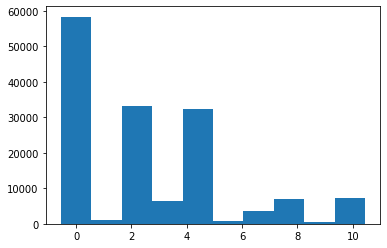

In [0]:
import matplotlib.pyplot as plt
x = np.array(x)
y = np.array(y)
plt.hist(y[2].flatten(),align='left') # 8번이 자동차를 나타냄. 224*224*3 의 개수를 histogram을 나타내서 본것.
# align은 배열 형태임. left , mid, right가 옵션으로 있으며, left를 해야 막대기가 눈금에 맞춰서 이쁘게 나옴.

In [0]:
y1 = np.where(y==8,1.,0.) # 실수로 줘야 됨. 실수를 안주면, 전부 까맣게 나옴. (0~255범위 수로 인식.)
# 자동차만 볼거임. 그래서 이렇게 바꿈.
y1.shape

(367, 224, 224, 3)

In [0]:
y.shape

(367, 224, 224, 3)

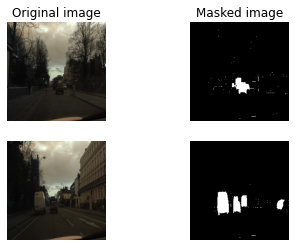

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(x[1])
plt.axis('off')
plt.title('Original image')
plt.grid('off')
plt.subplot(222)
plt.imshow(y1[1])
plt.axis('off')
plt.title('Masked image')
plt.grid('off')
plt.subplot(223)
plt.imshow(x[2])
plt.axis('off')
plt.grid('off')
plt.subplot(224)
plt.imshow(y1[2])
plt.axis('off')
plt.grid('off')
plt.show()

In [0]:
y.shape

(367, 224, 224, 3)

In [0]:
y[2,100:,:50].shape

(124, 50, 3)

(array([1269.,   60.,    0., 4998.,    0., 3213., 7278.,    0.,   78.,
        1704.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

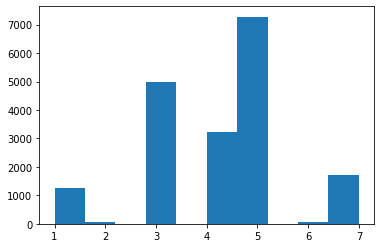

In [0]:
plt.hist(y[2,100:,:50].flatten()) # 앞에서 한 내용. pass

In [0]:
type(x)

numpy.ndarray

In [0]:
x = np.array(x) #확실하게 하기 위해
y2 = np.array(y1)[:,:,:,0] # 0번째만 가진것으로 바꿈. 어차피 채널3개에 같은값이 들어가있어서 그럼. 
                           # 근데, 이렇게 하면 y2 의 shape이 (367,224,224) 3D tensor임. 당연하다. 0번째껄 선택해서 보고있으므로.
y2 = y2.reshape(y2.shape[0],y2.shape[1],y2.shape[2],1) # 그래서 채널이 1개짜리로 reshape 해줌. class항에 해당함.
print(x.shape, y2.shape)

# 224x 224의 binary cross entropy를 적용 중.
# 잊지말것. 아직은 instance segmentation을 하고 있다. 

(367, 224, 224, 3) (367, 224, 224, 1)


In [0]:
x = x/255
print(np.max(x))

1.0


In [0]:
from tensorflow.keras.applications.vgg16 import VGG16
base_vgg16 = VGG16(input_shape =  (224,224,3), include_top = False, weights = 'imagenet')
base_vgg16.trainable = False
base_vgg16.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [0]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D,UpSampling2D, Dropout, concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [0]:
# 위에서 모델을 정의한 뒤에, 다시 모델 class를 써서 정의하는거임. output 자신으로만 정의.
# 중간에 dropout도 이렇게 섞어서도 쓸수있음. 계산된 값이 아니라, 구조에 관련한 것들이기 때문.

conv1 = Model(inputs=base_vgg16.input , outputs=base_vgg16.get_layer('block1_conv2').output).output
conv2 = Model(inputs=base_vgg16.input , outputs=base_vgg16.get_layer('block2_conv2').output).output
conv3 = Model(inputs=base_vgg16.input , outputs=base_vgg16.get_layer('block3_conv3').output).output
conv4 = Model(inputs=base_vgg16.input , outputs=base_vgg16.get_layer('block4_conv3').output).output # convolution + dropout이 한 세트.
drop4 = Dropout(0.5)(conv4) # 28x28x512
conv5 = Model(inputs=base_vgg16.input,outputs=base_vgg16.get_layer('block5_conv3').output).output # convolution + dropout이 한 세트.
drop5 = Dropout(0.5)(conv5) # 14x14x512

# 굉장히 유용하다. output을 받는거임. 각 모델별 input으로해서 꺼내는거임. 누적된 모형의 output을 받는거임.
# 적용만 하는거임. trainable false이기 때문.



In [0]:
drop4

<tf.Tensor 'dropout/Identity:0' shape=(None, 28, 28, 512) dtype=float32>

In [0]:
# 구조가 마치 대칭적임. (즉, residual connection (skip connection이 맞을듯)을 통해 보완.) - U shape (symmetric 방법.)
# he초기값을 사용했다. 생략
# BN이 있다. 위내용들은 아니까 생략.

# 아래에 2,3,1 은 전부 filter size임. 단순함.
up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(UpSampling2D(size =(2,2))(drop5)) # 28x28x512
merge6 = concatenate([drop4,up6], axis = -1) # 채널방향으로 붙임.

conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(conv6)
conv6 = BatchNormalization()(conv6)
up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(UpSampling2D(size =(2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = -1)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(merge7)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(conv7)
conv7 = BatchNormalization()(conv7)
up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(UpSampling2D(size =(2,2))(conv7))
merge8 = concatenate([conv2,up8],axis = -1)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(conv8)
conv8 = BatchNormalization()(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(UpSampling2D(size =(2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = -1)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(conv9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(conv9)
conv9 = BatchNormalization()(conv9)

conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9) # 최종. 모든 채널에 대해 weight sum(=convolution)을 시행함.

In [0]:
model = Model(inputs = base_vgg16.input, outputs = conv10)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
____________________________________________________________________________________________

In [0]:
for layer in model.layers[:18]: # vgg임. 18개의 층에대해 trainable하지 않음. 뒤쪽 층에서만 train시킬꺼임.
  layer.trainable = False

In [0]:
model.compile(optimizer=Adam(1e-3, decay = 1e-6), 
                   loss='binary_crossentropy', metrics = ['accuracy'])

In [0]:
history = model.fit(x,y2,epochs=10,batch_size=1,validation_split=0.1) #sgd

Epoch 1/10
330/330 [==============================] - 55s 167ms/step - loss: 0.2606 - accuracy: 0.9324 - val_loss: 0.6327 - val_accuracy: 0.7380
Epoch 2/10
330/330 [==============================] - 53s 162ms/step - loss: 0.1005 - accuracy: 0.9662 - val_loss: 0.2428 - val_accuracy: 0.9203
Epoch 3/10
330/330 [==============================] - 53s 161ms/step - loss: 0.0760 - accuracy: 0.9746 - val_loss: 0.1927 - val_accuracy: 0.9375
Epoch 4/10
330/330 [==============================] - 53s 160ms/step - loss: 0.0621 - accuracy: 0.9793 - val_loss: 0.0648 - val_accuracy: 0.9783
Epoch 5/10
330/330 [==============================] - 53s 160ms/step - loss: 0.0524 - accuracy: 0.9825 - val_loss: 0.1511 - val_accuracy: 0.9484
Epoch 6/10
330/330 [==============================] - 53s 160ms/step - loss: 0.0464 - accuracy: 0.9847 - val_loss: 0.0677 - val_accuracy: 0.9749
Epoch 7/10
330/330 [==============================] - 53s 160ms/step - loss: 0.0423 - accuracy: 0.9865 - val_loss: 0.0649 - val_ac

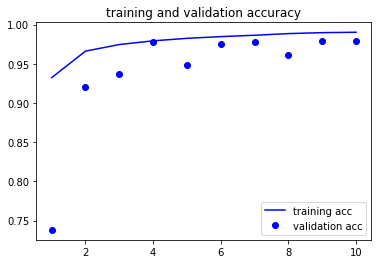

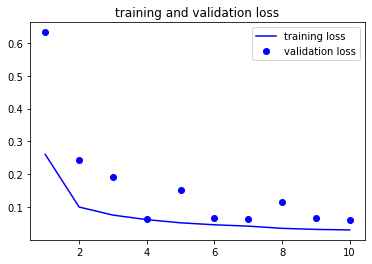

In [0]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [0]:
y_pred = model.predict(x[-2:])
#np.mean(y_predi == y_testi)

In [0]:
y_pred.shape

(2, 224, 224, 1)

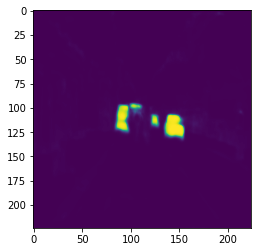

In [0]:
plt.imshow(y_pred[-1,:,:,0]) #마지막거 확인. 채널도 0값을 줌으로써 224x224를 출력할수있게 만든다.

In [0]:
y2.shape

(367, 224, 224, 1)

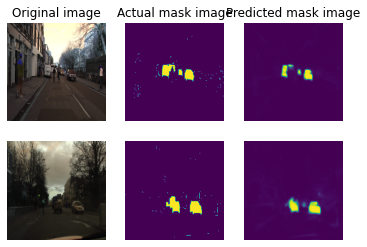

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(231)
plt.imshow(x[-1])
plt.axis('off')
plt.title('Original image')
plt.grid('off')
plt.subplot(232)
plt.imshow(y2[-1,:,:,0])
plt.axis('off')
plt.title('Actual mask image')
plt.grid('off')
plt.subplot(233)
plt.imshow(y_pred[-1,:,:,0])
plt.axis('off')
plt.title('Predicted mask image')
plt.grid('off')
plt.subplot(234)
plt.imshow(x[-2])
plt.axis('off')
plt.grid('off')
plt.subplot(235)
plt.imshow(y2[-2,:,:,0])
plt.axis('off')
plt.grid('off')
plt.subplot(236)
plt.imshow(y_pred[-2,:,:,0])
plt.axis('off')
plt.grid('off')
plt.show()

In [0]:
from tensorflow.keras.utils import plot_model

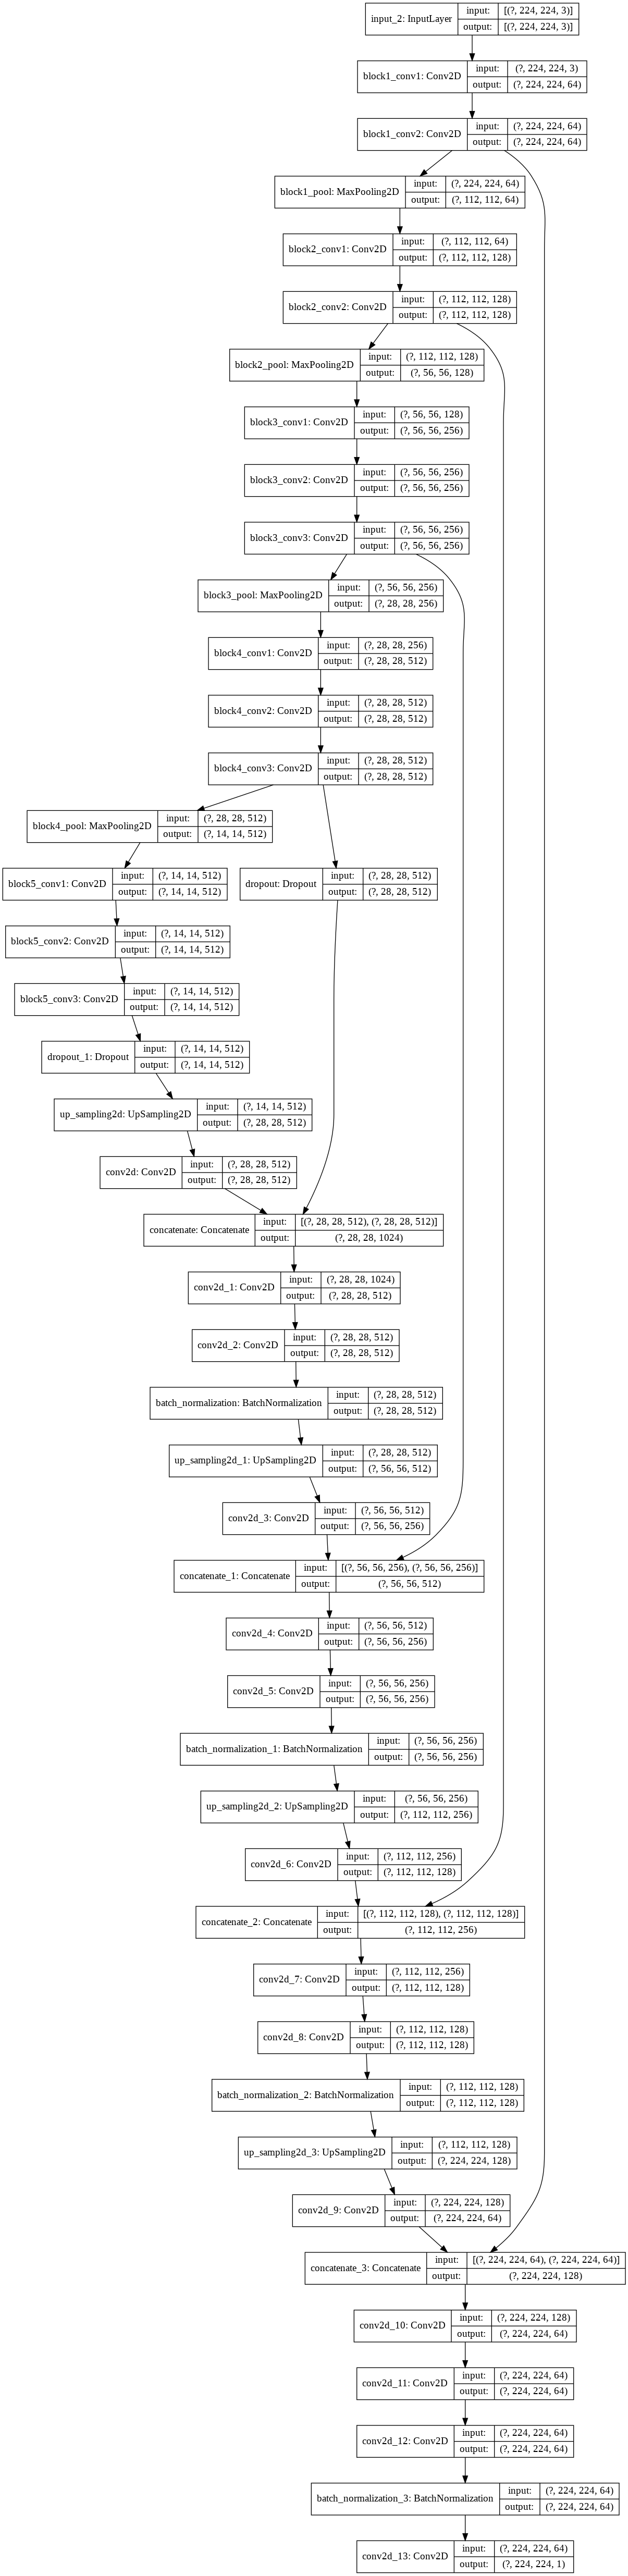

In [0]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')



#이렇게 생겼음. 확인.

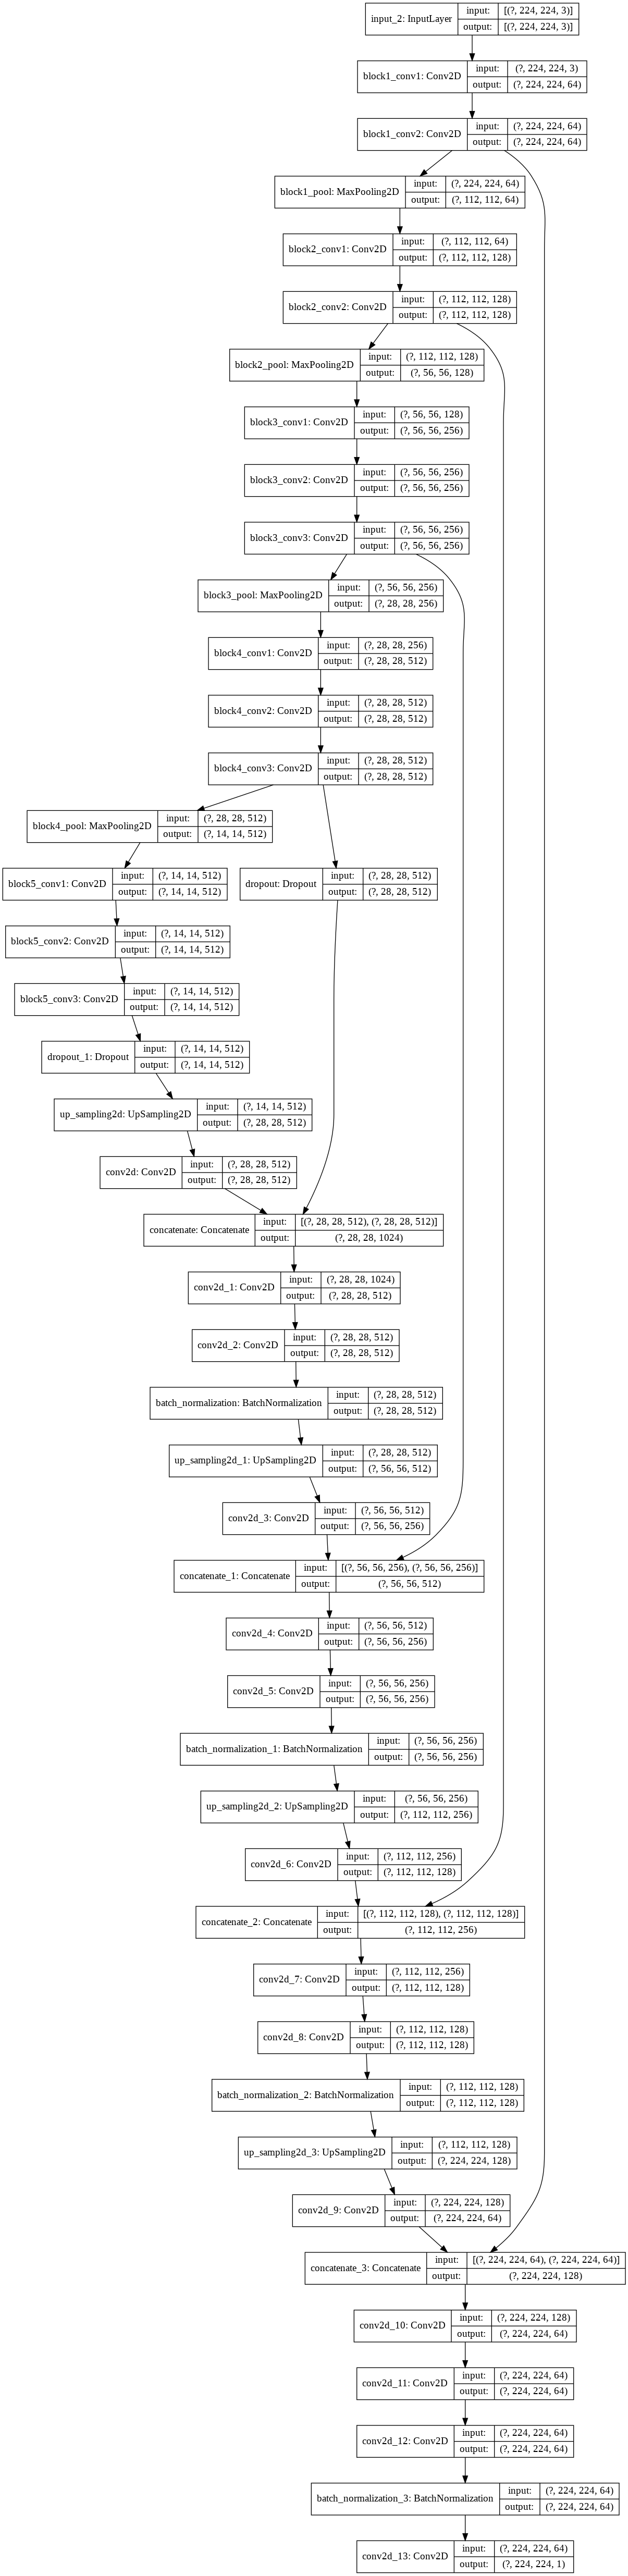

In [0]:
from IPython.display import Image
Image(retina=True, filename='model.png') # 모델을 보여주는 메서드인듯.
